In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection  import SelectKBest, SelectPercentile

In [2]:
train = pd.read_csv('santander-train.csv')
test = pd.read_csv('santander-test.csv')
data = pd.concat([train,test])
data = data.head(20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0


In [3]:
X = data.drop(['TARGET'], axis =1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

## Remove Constant, Quasi Constant, and Correlated Features

In [5]:
constant_filter = VarianceThreshold(threshold = 0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

X_train_filter.shape, X_test_filter.shape

((16000, 245), (4000, 245))

In [6]:
# remove duplicate features

X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [7]:
 X_train_T.duplicated().sum()

18

In [8]:
duplicated_features = X_train_T.duplicated()

In [9]:
features_to_keep = [ not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [10]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### Now do F-Test

In [11]:
sel = f_classif(X_train_unique, y_train)
sel

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

In [13]:
sel[1] # p-value

array([5.58161700e-01, 2.67561647e-01, 8.89333290e-37, 5.26569363e-01,
       3.60080335e-01, 9.60986695e-01, 8.33552698e-01, 7.11954403e-01,
       1.74213527e-01, 1.53591870e-01, 9.28817521e-01, 2.85533263e-01,
       9.36623841e-01, 8.01575252e-05, 8.94375507e-05, 3.36393721e-04,
       5.77577141e-05, 6.48544590e-05, 4.79763179e-04, 7.63701483e-01,
       3.16255673e-01, 8.76012543e-05, 5.56578484e-56, 4.68990120e-08,
       1.11700314e-03, 2.86219940e-07, 4.53647534e-05, 2.16766394e-08,
       6.67830586e-07, 3.44933857e-07, 1.10916535e-08, 1.61796584e-03,
       1.18682969e-04, 1.07709938e-04, 2.42680916e-04, 8.01812206e-03,
       2.24116226e-04, 4.78913410e-03, 7.66573763e-70, 1.80177928e-01,
       1.96396787e-01, 5.01825968e-04, 8.68554202e-04, 3.16255673e-01,
       1.27861727e-01, 3.66783202e-21, 6.04554908e-03, 2.03825983e-53,
       4.68990120e-08, 1.11700314e-03, 3.16348432e-07, 4.62436764e-05,
       6.28457802e-08, 7.73029885e-07, 3.44933857e-07, 1.80109375e-02,
      

In [14]:
p_values = pd.Series(sel[1])

In [15]:
p_values.index = X_train_unique.columns
p_values.sort_values(ascending =True, inplace=True)

<AxesSubplot:>

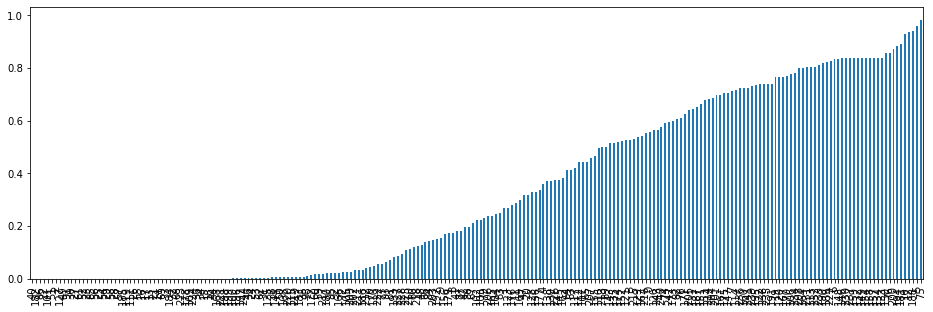

In [16]:
p_values.plot.bar(figsize=(16,5))

In [17]:
p_values = p_values[p_values < 0.05]

In [18]:
p_values.index

Int64Index([ 40, 182,  86,  22, 101,  51,   2, 127,  49,  91,  30,  27,  61,
             52,  23,  85,  56,  25,  54,  29,  58,  28,  57, 185, 119, 111,
             26,  55,  16,  17,  13,  21,  14,  69,  33, 184,  32,  68, 223,
            178, 109, 224,  36,  34,  15,  18,  44, 168, 221, 198, 199, 100,
            196, 197, 244,  46,  24,  53,  62,  31, 125,  38, 144,  50, 108,
            220, 115, 219, 183,  35,  98, 172,  60,  59, 217, 180,  95,  92,
            166,  72, 105, 209, 202, 211, 186, 212,  70, 110],
           dtype='int64')

In [19]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

## Build The Model Classifier

In [20]:
def run_RandomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 10, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('accuracy: ', accuracy_score(y_test, y_pred))

In [21]:
%%time

run_RandomForest(X_train_p, X_test_p, y_train, y_test)

accuracy:  0.952
Wall time: 711 ms


In [22]:
%%time

run_RandomForest(X_train, X_test, y_train, y_test)

accuracy:  0.95825
Wall time: 1.06 s
